In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("bank-loan.csv")

In [3]:
dataset.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
5,41,2,5,5,25,10.2,0.392700,2.157300,0.0
6,39,1,20,9,67,30.6,3.833874,16.668126,0.0
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
8,24,1,3,4,19,24.4,1.358348,3.277652,1.0
9,36,1,0,13,25,19.7,2.777700,2.147300,0.0


In [4]:
#Missing Percentage of all the features
def missing_percentage(df):     
    missing_total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([missing_total, percent], axis=1, keys=['Missing_Total','Percent'])

In [5]:
missing_percentage(pd.DataFrame(dataset))

,Missing_Total,Percent
default,150,17.65


In [6]:
#check the Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [7]:
dataset.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


Y values are missing at random, then the incomplete cases contribute no information to the regression of Y on X1,...,Xp

In other words, when the X’s are complete, there is no need for imputation, because 
maximum-likelihood estimates can be obtained simply by deleting the cases with missing Y. 

Using imputed Y values in analysis would simply add noise to these estimates

In [8]:
#Let extract the default value which are not null.
#Keep the orginal dataset copy
dataset_orignal = dataset.copy()

#And let keep the NAN value separate!
dataset_NaN = dataset[pd.isnull(dataset['default'])]

#Clear all the NaN value
dataset.dropna(inplace=True)

In [9]:
#Checking for missing value
missing_percentage(dataset)

,Missing_Total,Percent


# Splitting the Features

In [10]:
#Ok lets use Logistic Regression on our dataset
feature_cols = ['age', 'ed', 'employ', 'address','income','debtinc','creddebt', 'othdebt']

X = dataset[feature_cols] # Features

y = dataset.default # Target variable

In [11]:
# # # Models to Evaluate

# We will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - DecisionTreeClassifier
# 4 - RandomForestClassifier
# 5-  XGBClassifier 

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation    
    accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, Y_train, model)
    
    # Return the performance metric
    return model_cross


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Splitting the Data

In [12]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [13]:
lr = LogisticRegression()
logistic_Regression = fit_and_evaluate(lr)

print('LogisticRegression Performance on the test set: Cross Validation Score = %0.4f' % logistic_Regression)

LogisticRegression Performance on the test set: Cross Validation Score = 0.8102


In [14]:
lr = LogisticRegression()
#lr = LogisticRegression(C=0.1, 
#                           max_iter=100, 
#                           fit_intercept=True, 
#                           n_jobs=3, 
#                           solver='liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#Lets predict
Y_predict = lr.predict(X_test)

**Confusion Matrix**

True positives (TP): Predicted positive and are actually positive.

False positives (FP): Predicted positive and are actually negative.

True negatives (TN): Predicted negative and are actually negative.

False negatives (FN): Predicted negative and are actually positive.

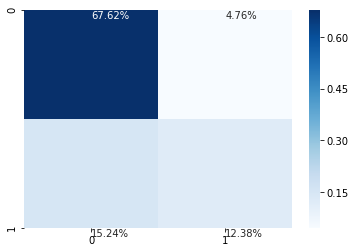

In [16]:
#Let us seaborn in confusion matrix
#sns.heatmap(cm, annot=True)
cm = confusion_matrix(Y_test, Y_predict)
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm/np.sum(cm), annot=True, annot_kws=annot_kws,
           fmt='.2%', cmap='Blues')


In [17]:
#Accuracy
lr.score(X_test, Y_test)

0.8

**Accuracy** : Proportions of total number of correct result.

(True Negative + True Positive / Total observation)

**Precision** : Proportion of correct positive results out of all predicted positive results.

(True Positive / True Positive + False Positive)

**Recall** : Proportion of actual positive cases.

(True Positive / True Positive + False Negative)

**F1 Score** : Harmonic mean of Precision and Recall

(2 * Precision * Recall / Precision + Recall)

In [18]:
print("--Confusion Matrix--")
cm1 = confusion_matrix(Y_test, Y_predict)
print(cm1)

--Confusion Matrix--
[[142  10]
 [ 32  26]]


In [19]:
#classification report about the model 
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       152
         1.0       0.72      0.45      0.55        58

   micro avg       0.80      0.80      0.80       210
   macro avg       0.77      0.69      0.71       210
weighted avg       0.79      0.80      0.78       210



From the confusion Matrix we can see that we make 10 wrong approval.
So that could be risk.

So we try to make less accuracy but the bad loan approvals can not
be more than 5%

So we will try to increase our precision

#Lets increase Threshold value

In [20]:
#Adjust the probabilities
Y_prob = lr.predict_proba(X_test)[:, 1]

In [21]:
#Classification based on the probalility values
Y_new_prob = []
#thresold = 0.8
#thresold = 0.75
#thresold = 0.6
thresold = 0.7

for i in range(0, len(Y_prob)):
    if Y_prob[i] > thresold:
        Y_new_prob.append(1)
    else:
        Y_new_prob.append(0)

In [22]:
#Now lets check the accuracy
print("--Confusion Matrix--")
cm2 = confusion_matrix(Y_test, Y_new_prob)
print(cm2)

#Accuracy
print()
print("---Accuracy---")
print(lr.score(X_test, Y_new_prob))

print()
print("--Classification Report--")
print(classification_report(Y_test, Y_new_prob))


--Confusion Matrix--
[[150   2]
 [ 46  12]]

---Accuracy---
0.8952380952380953

--Classification Report--
              precision    recall  f1-score   support

         0.0       0.77      0.99      0.86       152
         1.0       0.86      0.21      0.33        58

   micro avg       0.77      0.77      0.77       210
   macro avg       0.81      0.60      0.60       210
weighted avg       0.79      0.77      0.72       210



**Summary**

So After changing threshold values we came to an end. And
0.7 or 70 percent is good enough to predict.

**Good Loans**
1. Anything above 70 percent probability - Approve

**Bad Loans**
2. Anything below 60 percent probability - Reject

**Manual Check**
3. The remaining 60 - 70  percent we should manually check.

In [23]:
#lets check auc_roc curve
fpr, tpr, threshold = roc_curve(Y_test, Y_prob)
auc = roc_auc_score(Y_test, Y_prob)
print("auc- ", auc)

auc-  0.8502722323049001


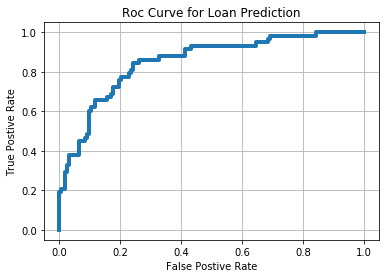

In [24]:
#Plot The roc curve
plt.plot(fpr, tpr, linewidth = 4)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("Roc Curve for Loan Prediction")
plt.grid()

Now what the graph tells us, what kind of false positive
we can except if we need to achieve a particular rate 
of true positive 


So in order to achieve a true positive rate which is basically making sure that almost all the correct approval
predicted we should ready to accept a false positive rate of almost 0.4

# Gain and Lift Chart

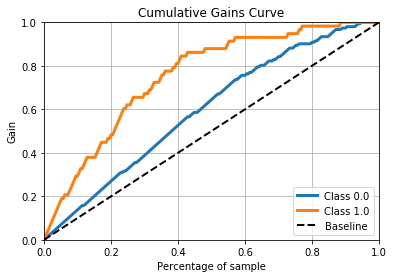

In [25]:
#Creating the plot
skplt.metrics.plot_cumulative_gain(Y_test, lr.predict_proba(X_test))

In our case, at the 40% point of the horizontal axis, the 80% observations with the highest probability are located. On the vertical axis, the curve indicates which percentage of all targets is included in this curve. So, if we can target the 40% of the observations, the model will ensure that 80% of the non-defaulter in total are in this group.

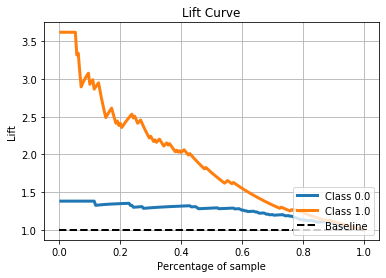

In [26]:
#Scikitplot library
skplt.metrics.plot_lift_curve(Y_test, lr.predict_proba(X_test))

Calculate the points on the lift curve by determining the ratio between the result predicted by our model
and the result using no model.

Lets have a look on other Classification Algorithms with there Cross Validation Score

**Cross-validation is a technique that is used for the assessment of how the results of statistical analysis generalize to an independent data set.**

In [27]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.7653


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

knn_cross = fit_and_evaluate(knn)
print('KNeighborsClassifier Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNeighborsClassifier Performance on the test set: Cross Validation Score = 0.7592


In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

dtc_cross = fit_and_evaluate(dtc)
print('DecisionTreeClassifier Performance on the test set: Cross Validation Score = %0.4f' % dtc_cross)

DecisionTreeClassifier Performance on the test set: Cross Validation Score = 0.7347


In [30]:
from xgboost.sklearn import XGBClassifier
model=XGBClassifier(random_state=1,learning_rate=0.01)

xgBoost_Cross = fit_and_evaluate(model)
print('XGBClassifier Performance on the test set: Cross Validation Score = %0.4f' % xgBoost_Cross)

XGBClassifier Performance on the test set: Cross Validation Score = 0.7837


**Summary**

My plan for the moment, is to use a classification algorithm to detect whether a loan is a good or bad, 
which will help us asses whether we should issue a loan or not when new information about a customer comes in.

I have check 5 classification algorithms from which Logistic Regression is the good model to predict.
Because of its Cross Validation Score is more than 80 percent. Additional after tuning thershold values we get a better precision and bad loan approval less than 5 percent.

# Now Lets Create the model and save it in a file

In [31]:
import pickle

In [32]:
with open('model_loan_defaulter', 'wb') as f:
    pickle.dump(lr, f)

In [33]:
with open('model_loan_defaulter', 'rb') as f:
    model_lr = pickle.load(f)

In [34]:
f.close

<function BufferedReader.close>

Lets Predict!!

In [35]:
new_loan = [[41, 3, 17, 12, 176, 9.3, 11.359392, 5.008608]]
model_lr.predict(new_loan)

array([1.])

I took the loan details from the dataset itself and it is predicting correctly